# Three or more group comparison

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
def MAD( datalist ):
    z = []#empty list
    for i in datalist:
        z.append( np.abs( i - np.median(datalist) ) )
    return np.median(z)

In [ ]:
#IMPORT DATA
pain_level = pd.read_csv( 'migraines.csv' )
pain_level

,Drug A,Drug B,Drug C
0,2,7,3
1,3,8,7
2,2,9,6
3,2,8,6
4,2,7,7
5,1,9,5
6,3,7,6
7,3,8,4
8,3,7,5


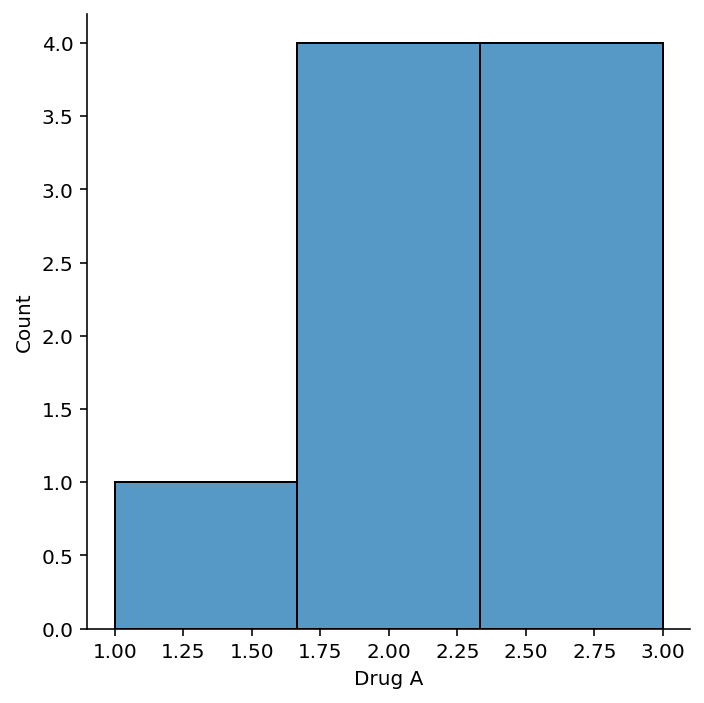

In [ ]:
#EXTRACT EACH COLUMN

drugA = pain_level['Drug A']
drugB = pain_level['Drug B']
drugC = pain_level['Drug C']

#PLOT DATASET
sns.displot( data = drugA , bins = 3)

In [ ]:
#FIND THE MADs OF EACH DATASET
print( MAD( drugA ) )
print( MAD( drugB ) )
print( MAD( drugC ) )

#BIG BOX ASSUMPTION CAN BE DONE

1.0
1.0
1.0


## HOW DO YOU COMPARE THREE GROUPS OR MORE?

Use your knowledge of two group comparison. 

In this week's lab we have three groups:

When comparing three groups, there is 3 distinct comparisons which can be done.

Group 1 vs Group 2

Group 1 vs Group 3

Group 2 vs Group 3

## WHEN IS THREE GROUP COMPARISON VALID? 

The groups need to pass the omnibus test.

How to perform the omnibus test?

Determine if your observed F-statistic is statistically significant.

$F = \frac{num}{ den}$

**Ratio** of the **across group variability** vs **within group variability**.

num = across group variability

den = within group variability

$$ F_{stat}=\frac{n_{a}|\widetilde{a}-\widetilde{G}|+n_{b}|\widetilde{b}-\widetilde{G}|+n_{c}|\widetilde{c}-\widetilde{G}|}{\Sigma|a_{i}-\widetilde{a}|+\Sigma|b_{i}-\widetilde{b}|+\Sigma|c_{i}-\widetilde{c}|} $$

$\widetilde{a}$ :the median of dataset A

$\widetilde{b}$ :the median of dataset B

$\widetilde{c}$ :the median of dataset C

$\widetilde{G}$: the grand median - median of all three datasets combined.

$n_a$: number of data points in dataset A

$n_b$: number of data points in dataset B

$n_c$: number of data points in dataset C

In our case $n_a = n_b = n_c$


$$ F_{stat}=\frac{n_{a} ( |\widetilde{a}-\widetilde{G}|+|\widetilde{b}-\widetilde{G}|+ |\widetilde{c}-\widetilde{G}| )}{\Sigma|a_{i}-\widetilde{a}|+\Sigma|b_{i}-\widetilde{b}|+\Sigma|c_{i}-\widetilde{c}|} $$




In [ ]:
#DO NOT CHANGE THIS FUNCTION
def Fcompute( data ):
    G = np.median(data) #grand median

    med_datas = data.median() #medians

    n = len( data )

    var_among = np.sum( n * np.abs(med_datas - G) ) #numerator

    var_within = np.sum( np.sum( np.abs( data - med_datas ) ) ) #denominator

    F = var_among/var_within

    return F

In [ ]:
Fobs = Fcompute( pain_level )
Fobs

2.7

# NHST on the F statistic

$H_0$: The observed F is not statistically significant.

Test theory:

1) Big box method.
2) Randomly distribute scores in three different groups.
3) Calculate F value.

In [ ]:
#ONE SIMULATION
#WE WILL NEED TO USE THE FOLLOWING FUNCTIONS
#np.concatenate()
#np.column_stack()
#pd.DataFrame()

drugA = pain_level['Drug A']
drugB = pain_level['Drug B']
drugC = pain_level['Drug C']

#CREATE THE BIG BOX MODEL
bigbox = np.concatenate( [ drugA ,drugB , drugC ] )

#TAKE 3 RANDOM RESAMPLES
resample_A = np.random.choice( bigbox , len( drugA ) )
resample_B = np.random.choice( bigbox , len( drugB ) ) #you can use the length of any of the 3 datasets since they have the same number of data points
resample_C = np.random.choice( bigbox , len( drugC ) )

#CREATE A DATA FRAME

#MAKE A MATRIX FIRST
col_matrix = np.column_stack( [resample_A,resample_B,resample_C] )

#CONVERT MATRIX INTO A DATA FRAME
df_drugs = pd.DataFrame( col_matrix )

Fcompute( df_drugs )

0.3829787234042553

0.0


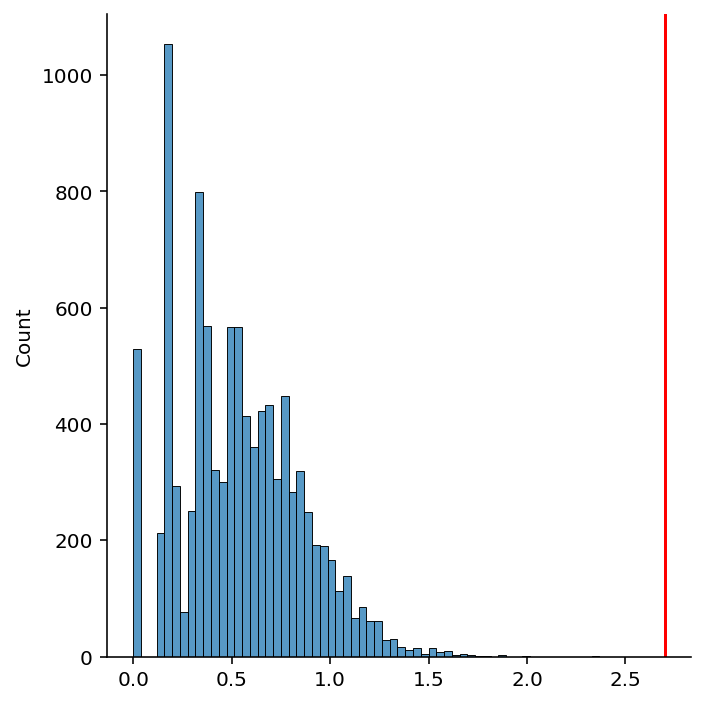

In [ ]:
#MULTIPLE SIMULATION
#USING AN EMPTY LIST
Flist = []
for i in range(10000):
    resample_A = np.random.choice( bigbox , 9 )
    resample_B = np.random.choice( bigbox , 9 )
    resample_C = np.random.choice( bigbox , 9 )

    col_matrix = np.column_stack( [resample_A,resample_B,resample_C] )
    df_drugs = pd.DataFrame( col_matrix )

    Flist.append( Fcompute( df_drugs ) )
    
sns.displot( data = Flist )
plt.axvline( Fobs , color = 'r' )

F_arr = np.array( Flist )
p = np.sum(F_arr>=Fobs)/len(F_arr)
print(p)

0.0


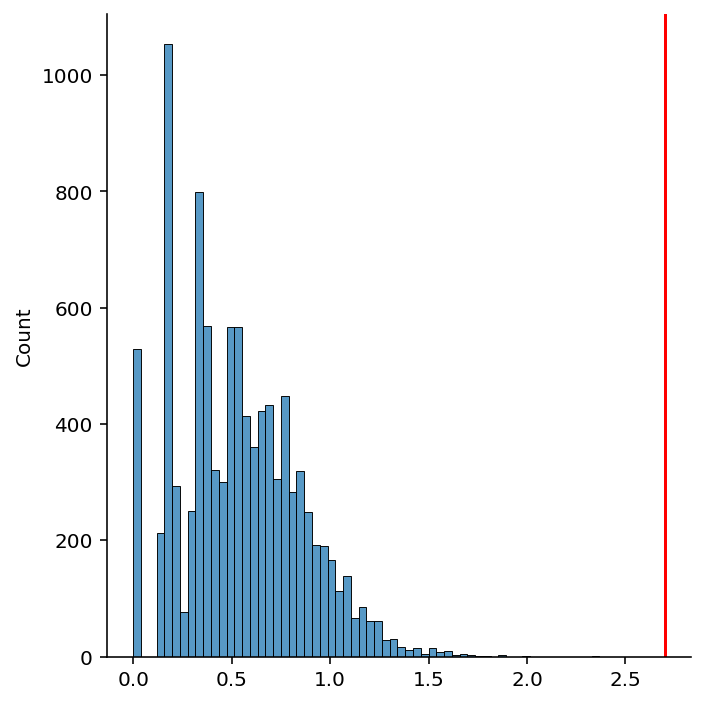

In [ ]:
#MULTIPLE SIMULATION
#USING np.zeros() FUNCTION

F_arr = np.zeros( 10000 )
for i in range(10000):
    resample_A = np.random.choice( bigbox , len( drugA ) )
    resample_B = np.random.choice( bigbox , len( drugB ) ) #you can use the length of any of the 3 datasets since they have the same number of data points
    resample_C = np.random.choice( bigbox , len( drugC ) )

    col_matrix = np.column_stack( [resample_A,resample_B,resample_C] )
    df_drugs = pd.DataFrame( col_matrix )

    F_arr[i] = Fcompute( df_drugs )
    
sns.displot( data = Flist )
plt.axvline( Fobs , color = 'r' )
p = np.sum(F_arr>=Fobs)/len(F_arr)
print(p)

# NHST comparing the datasets

$H_0$: There's no difference between the different drugs, and the observed difference in the median is due to random chance.

Mathematically: $median_1 - median_2 = 0$

Test:
1) Join the groups together into the same population (one box universe).
2) Randomly resample scores in two different groups - drug1 and drug2.
3) Take the difference in the two groups median values.
4) Perform this task multiple times (multiple simulations).

0.0116


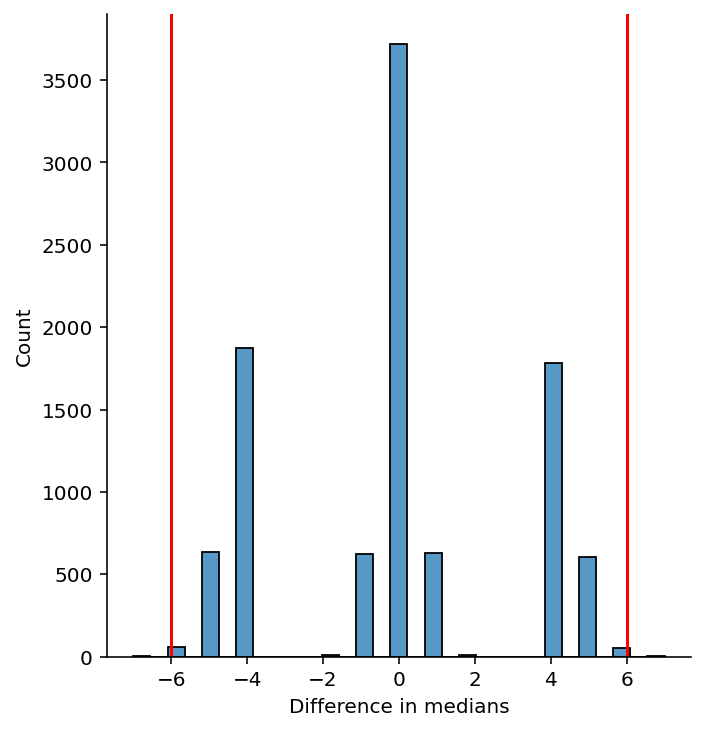

In [ ]:
#YOU CAN USE THE SAME ANALYSIS IN LAB 3
#COMPARING MEDIANS

#LET'S COMPARE DRUG A VS DRUG B

drugA_arr = np.array( drugA )
drugB_arr = np.array( drugB )
na = len(drugA_arr)
nb = len(drugB_arr)

obs = np.median( drugA_arr ) - np.median( drugB_arr )

pos_obs = np.abs(obs)
other_limit = -pos_obs

pop = np.concatenate( [drugA_arr,drugB_arr] )

simulations = 10000

dlist = []
for i in range(simulations):
    resample_A = np.random.choice( pop, na )
    resample_B = np.random.choice( pop, nb )
    m1 = np.median(resample_A)
    m2 = np.median(resample_B)
    d = m1 - m2
    dlist.append( d )

p = sns.displot( data = dlist )
p.set( xlabel = 'Difference in medians' )
plt.axvline( pos_obs , color = 'red' )
plt.axvline( other_limit , color = 'red' )

#pvalue
d_arr = np.array( dlist )
extreme_right = np.sum( d_arr >= pos_obs )
extreme_left = np.sum( d_arr <= other_limit )
extreme = extreme_right + extreme_left

pvalue = extreme/simulations

print(pvalue)

In [ ]:
#IF YOU NOTICE THE WORK WILL GET REPETITIVE
#SO LET'S MAKE A FUCNTION THAT TAKES IN ANY 2 DATSETS AND COMPARES THEM USING THE BIG BOX ASSUMPTION

def BigBoxCompare( data1 , data2 ): #function takes in 2 inputs

    #CONVERTS BOTH DATASETS INTO ARRAYS
    data1_arr = np.array( data1 )
    data2_arr = np.array( data2 )

    #FIND THE LENGTH OF BOTH DATASETS
    n1 = len(data1_arr)
    n2 = len(data2_arr)

    #FIND THE OBSERVED MEASUREMENT
    Mobs = np.median( data1_arr ) - np.median( data2_arr )

    #CONVERT Mobs INTO POSITIVE VALUE
    pos_obs = np.abs(Mobs)
    other_limit = -pos_obs

    #JOIN BOTH DATASETS TOGETHER
    pop = np.concatenate( [data1_arr,data2_arr] )

    simulations = range(10000)
    dlist = []
    for i in simulations:
        resample_1 = np.random.choice( pop, n1 )
        resample_2 = np.random.choice( pop, n2 )
        m1 = np.median(resample_1)
        m2 = np.median(resample_2)
        d = m1 - m2
        dlist.append( d )

    #p = sns.displot( data = dlist )
    #p.set( xlabel = 'Difference in medians' )
    #plt.axvline( pos_obs , color = 'red' )
    #plt.axvline( other_limit , color = 'red' )

    #pvalue
    d_arr = np.array( dlist )
    extreme_right = np.sum( d_arr >= pos_obs )
    extreme_left = np.sum( d_arr <= other_limit )
    extreme = extreme_right + extreme_left

    pvalue = extreme/len( d_arr )

    return  pvalue

pvalue1 = BigBoxCompare( drugA , drugB )
pvalue2 = BigBoxCompare( drugA , drugC )
pvalue3 = BigBoxCompare( drugB , drugC )

print( pvalue1 )
print( pvalue2 )
print( pvalue3 )

0.0132
0.0136
0.0771


## Post Hoc Analysis

When performing multiple tests, we need to perform a multiple-test correction - either the Benjamini-Hochberg correction or the Bonferroni correction.

We can do these correction either by hand or with Python. 

If performing the correction with Python, we need to import the statsmodels.stats.multites library. We typically give this library the name smm.

import statsmodels.stats.multitest as smm

The function we are interested in using from statsmodels.stats.multites library, is the smm.multipletests() function.

This function takes 3 inputs:

$1^{st}$: the list of pvalues you are correcting.

$2^{nd}$: the threshold you are using, $\alpha$.

$3^{rd}$: the method (as a string) you are using, Benjamini-Hochberg correction or the Bonferroni correction.

smm.multipletests( pvals, alpha, method)

The output contains 4 values:

$1^{st}$: an array specifying which pvalues are statistically significant.

$2^{nd}$: the corrected pvalues.

$3^{rd}$: the corrected alpha for Sidak method - NOT IMPORTANT

$4^{th}$: corrected alpha for Bonferroni method

In [ ]:
#WHEN PERFORMING MULTIPLE SIMULATIONS YOU NEED TO MAKE SURE YOU PERFORM A CORRECTION
#WE WILL PERFORM A Benjamini-Hochberg CORRECTION
import statsmodels.stats.multitest as smm

#STORE YOUR PVALUES IN A LIST
pvalue_list = [pvalue1, pvalue2, pvalue3]

#CHOICE A THRESHOLD (ALPHA)
threshold = 0.05

#TYPE 'fdr_bh' IN THE METHOD SECTION - THIS LETS THE FUNCTION KNOW WE ARE PERFORMING A Benjamini-Hochberg CORRECTION

smm.multipletests(pvalue_list, alpha = threshold , method = 'fdr_bh')

(array([ True,  True, False]),
 array([0.018 , 0.018 , 0.0782]),
 0.016952427508441503,
 0.016666666666666666)

### WE CAN SEE ONLY THE FIRST TWO PVALUES REMAIN STATISTICALLY SIGNIFICANT

### AND THE UPDATED VALUES ARE $pvalue_1 = 0.018$ AND  $pvalue_2 = 0.018$.

### THERE IS NO STATISTICALLY SIGNIFICANT DIFFERENCE BETWEEN DRUG B AND DRUG C